# Question 2

II. What states (of those I am willing to move to) have the highest paying data-related
salaries?
- Differences between job sub-categories?
- Which companies have the highest salaries for those sub-types?
- Will the answer change if I take standard of living into account?



In [10]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# File to Load
salary_data_to_load="salary_data_states.xlsx"

#Read Salary Data File and store into Pandas Data Frames

salary_data=pd.read_excel(salary_data_to_load)
salary_data['EMPLOYER_NAME'] = salary_data['EMPLOYER_NAME'].str.replace('[,.]', '', regex=True).str.upper().str.strip()

In [11]:
salary_data.head()

,CASE_NUMBER,CASE_STATUS,CASE_RECEIVED_DATE,DECISION_DATE,EMPLOYER_NAME,PREVAILING_WAGE_SUBMITTED,PREVAILING_WAGE_SUBMITTED_UNIT,PAID_WAGE_SUBMITTED,PAID_WAGE_SUBMITTED_UNIT,JOB_TITLE,...,PREVAILING_WAGE_SOC_TITLE,WORK_STATE,WORK_STATE_ABBREVIATION,WORK_POSTAL_CODE,FULL_TIME_POSITION_Y_N,VISA_CLASS,PREVAILING_WAGE_PER_YEAR,PAID_WAGE_PER_YEAR,JOB_TITLE_SUBGROUP,order
0,I-200-14073-248840,denied,3/14/2014,3/21/2014,ADVANCED TECHNOLOGY GROUP USA INC,6217100.0,year,62171.0,year,SOFTWARE ENGINEER,...,"Software Developers, Applications",Illinois,IL,NaN,y,H-1B,NaN,62171.0,software engineer,1
1,A-15061-55212,denied,3/19/2015,3/19/2015,SAN FRANCISCO STATE UNIVERSITY,5067600.0,year,91440.0,year,Assistant Professor of Marketing,...,"Business Teachers, Postsecondary",California,CA,94132.0,NaN,greencard,NaN,91440.0,assistant professor,2
2,I-200-13256-001092,denied,9/13/2013,9/23/2013,CAROUSEL SCHOOL,4947000.0,year,49470.0,year,SPECIAL EDUCATION TEACHER,...,"Special Education Teachers, Kindergarten and E...",California,CA,NaN,y,H-1B,NaN,49470.0,teacher,3
3,I-200-14087-353657,denied,3/28/2014,4/7/2014,HARLINGEN CONSOLIDATED INDEPENDENT SCHOOL DIST...,251052.0,month,43800.0,year,SCIENCE TEACHER,...,"Biological Science Teachers, Postsecondary",Texas,TX,NaN,y,H-1B,NaN,43800.0,teacher,4
4,I-203-14259-128844,denied,9/16/2014,9/23/2014,SIGNAL SCIENCES CORPORATION,84573.0,bi-weekly,170000.0,year,SENIOR SOFTWARE ENGINEER,...,"Software Developers, Systems Software",Oregon,OR,NaN,y,E-3 Australian,NaN,170000.0,software engineer,5


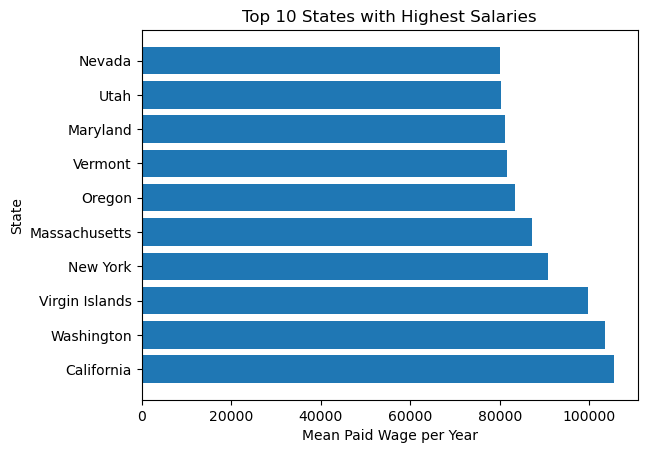

In [12]:
#What states have the highest paying data-related salaries? 

#data analyst, data scientist,business analyst,software engineer
data_related_salary_data=salary_data[salary_data["JOB_TITLE_SUBGROUP"].str.contains("data|analyst|software")]

state_wage_mean = data_related_salary_data.groupby('WORK_STATE')['PAID_WAGE_PER_YEAR'].mean().reset_index(name='PAID_WAGE_PER_YEAR').sort_values(['PAID_WAGE_PER_YEAR'], ascending=False).head(10)

x = state_wage_mean['WORK_STATE']
y = state_wage_mean['PAID_WAGE_PER_YEAR']
plt.barh(x, y)

plt.ylabel('State')
plt.xlabel('Mean Paid Wage per Year')
plt.title('Top 10 States with Highest Salaries')
plt.show()


In [13]:
state_wage_mean_table = pd.DataFrame({'State': state_wage_mean['WORK_STATE'], 'Mean Wage': state_wage_mean['PAID_WAGE_PER_YEAR']})
state_wage_mean_table.sort_values('Mean Wage',ascending=False).head(10)

,State,Mean Wage
4,California,105501.029843
51,Washington,103455.704430
49,Virgin Islands,99788.000000
33,New York,90709.255010
22,Massachusetts,87167.993970
38,Oregon,83450.014549
48,Vermont,81494.736842
21,Maryland,81134.889605
47,Utah,80210.028694
29,Nevada,79926.140843


In [5]:
#Differences between job sub-categories?

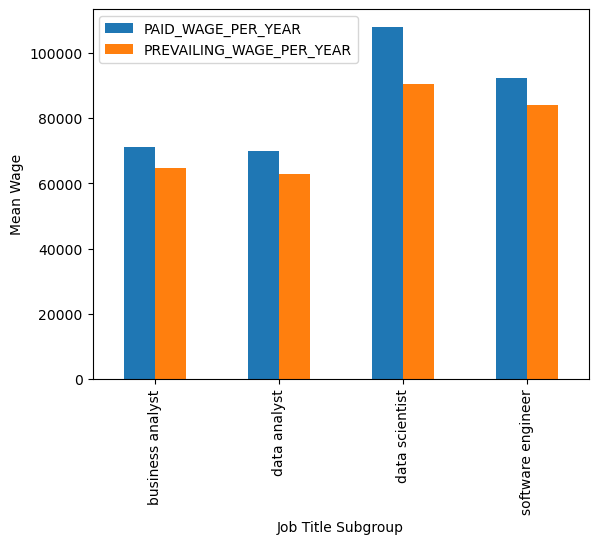

In [14]:
data_analyst_salary_data=salary_data[salary_data["JOB_TITLE_SUBGROUP"]=="data analyst"]
data_scientist_salary_data=salary_data[salary_data["JOB_TITLE_SUBGROUP"]=="data scientist"]

category_wage_mean = data_related_salary_data.groupby("JOB_TITLE_SUBGROUP")[['PAID_WAGE_PER_YEAR',"PREVAILING_WAGE_PER_YEAR"]].mean()
category_wage_mean.plot(kind='bar')
plt.xlabel('Job Title Subgroup')
plt.ylabel('Mean Wage')
plt.show()

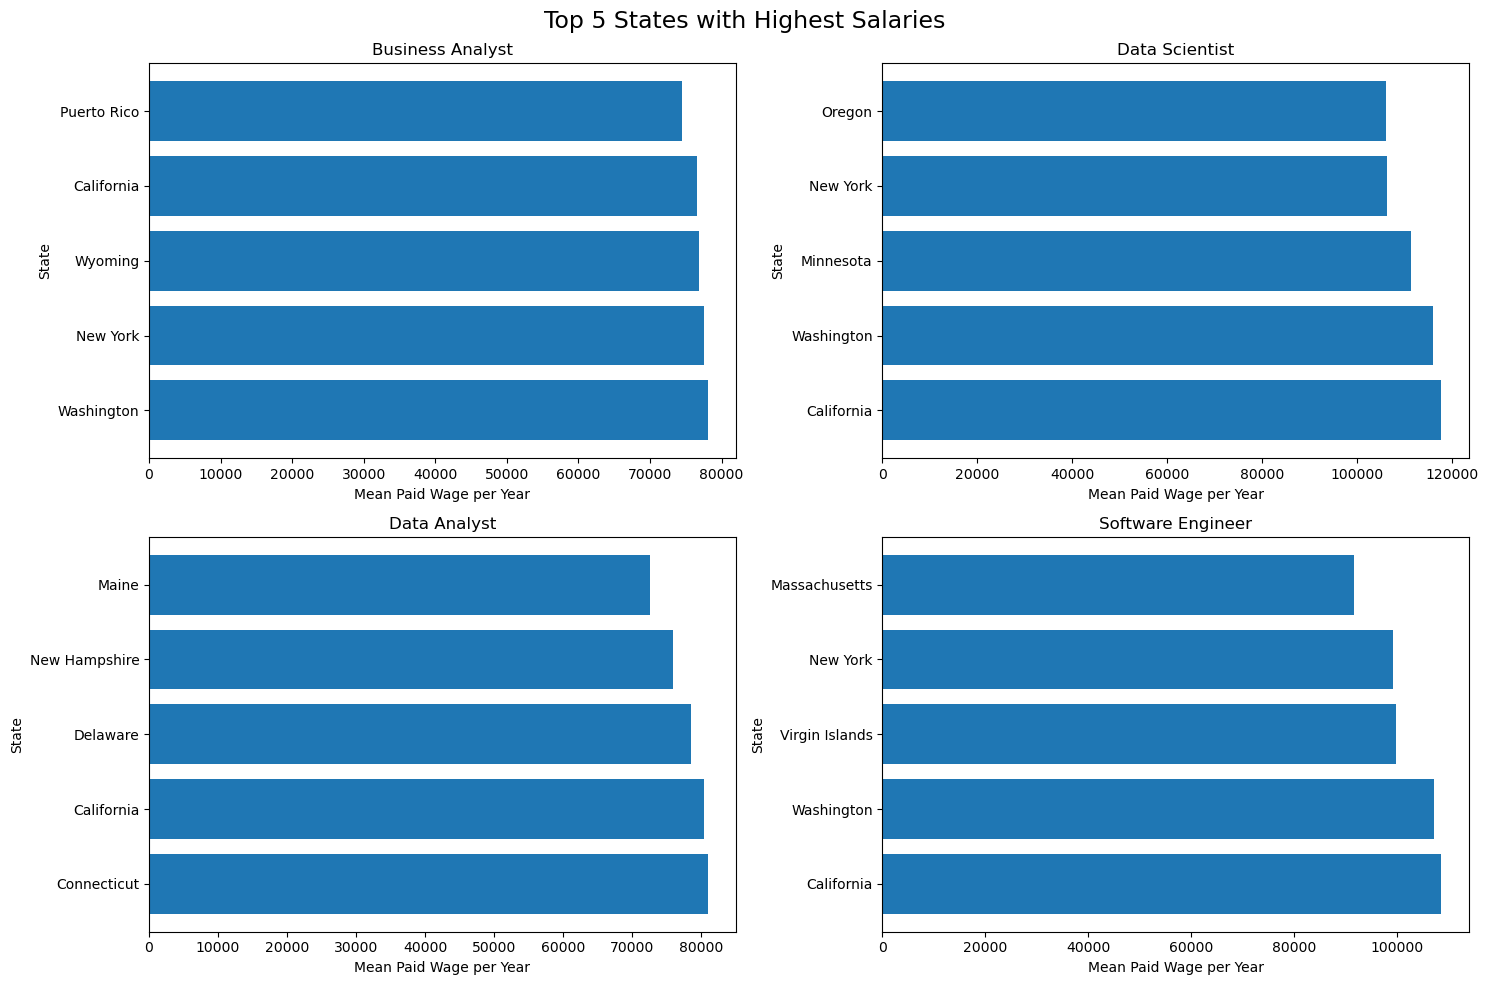

In [15]:
ba_salary_data=salary_data[salary_data["JOB_TITLE_SUBGROUP"]=="business analyst"]
ds_salary_data=salary_data[salary_data["JOB_TITLE_SUBGROUP"]=="data scientist"]
da_salary_data=salary_data[salary_data["JOB_TITLE_SUBGROUP"]=="data analyst"]
se_salary_data=salary_data[salary_data["JOB_TITLE_SUBGROUP"]=="software engineer"]

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

#business analyst
ba_state_wage_mean = ba_salary_data.groupby('WORK_STATE')['PAID_WAGE_PER_YEAR'].mean().reset_index(name='PAID_WAGE_PER_YEAR').sort_values(['PAID_WAGE_PER_YEAR'], ascending=False).head(5)

x = ba_state_wage_mean['WORK_STATE']
y = ba_state_wage_mean['PAID_WAGE_PER_YEAR']
axs[0, 0].barh(x, y)
axs[0, 0].set_title('Business Analyst')

#data scientist

ds_state_wage_mean = ds_salary_data.groupby('WORK_STATE')['PAID_WAGE_PER_YEAR'].mean().reset_index(name='PAID_WAGE_PER_YEAR').sort_values(['PAID_WAGE_PER_YEAR'], ascending=False).head(5)

x = ds_state_wage_mean['WORK_STATE']
y = ds_state_wage_mean['PAID_WAGE_PER_YEAR']
axs[0, 1].barh(x, y)
axs[0, 1].set_title('Data Scientist')


# Data analyst
da_state_wage_mean = da_salary_data.groupby('WORK_STATE')['PAID_WAGE_PER_YEAR'].mean().reset_index(name='PAID_WAGE_PER_YEAR').sort_values(['PAID_WAGE_PER_YEAR'], ascending=False).head(5)

x = da_state_wage_mean['WORK_STATE']
y = da_state_wage_mean['PAID_WAGE_PER_YEAR']
axs[1, 0].barh(x, y)
axs[1, 0].set_title('Data Analyst')

# Software engineer
se_state_wage_mean = se_salary_data.groupby('WORK_STATE')['PAID_WAGE_PER_YEAR'].mean().reset_index(name='PAID_WAGE_PER_YEAR').sort_values(['PAID_WAGE_PER_YEAR'], ascending=False).head(5)

x = se_state_wage_mean['WORK_STATE']
y = se_state_wage_mean['PAID_WAGE_PER_YEAR']
axs[1, 1].barh(x, y)
axs[1, 1].set_title('Software Engineer')


fig.suptitle('Top 5 States with Highest Salaries', fontsize=17)
for ax in axs.flat:
    ax.set(xlabel='Mean Paid Wage per Year', ylabel='State')

fig.tight_layout()

In [17]:
#Which companies have the highest salaries for those sub-types?

# Business Analyst
ba_company = ba_salary_data.groupby(["EMPLOYER_NAME"])['PAID_WAGE_PER_YEAR'].mean().reset_index(name='PAID_WAGE_PER_YEAR')
ba_highest_paid_company = ba_company.sort_values("PAID_WAGE_PER_YEAR", ascending=False).iloc[0]

# Data Scientist
ds_company = ds_salary_data.groupby(["EMPLOYER_NAME"])["PAID_WAGE_PER_YEAR"].mean().reset_index(name="PAID_WAGE_PER_YEAR")
ds_highest_paid_company = ds_company.sort_values("PAID_WAGE_PER_YEAR", ascending=False).iloc[0]

# Data Analyst
da_company = da_salary_data.groupby(["EMPLOYER_NAME"])["PAID_WAGE_PER_YEAR"].mean().reset_index(name="PAID_WAGE_PER_YEAR")
da_highest_paid_company = da_company.sort_values("PAID_WAGE_PER_YEAR", ascending=False).iloc[0]

# Software Engineer
se_company = se_salary_data.groupby(["EMPLOYER_NAME"])["PAID_WAGE_PER_YEAR"].mean().reset_index(name="PAID_WAGE_PER_YEAR")
se_highest_paid_company = se_company.sort_values("PAID_WAGE_PER_YEAR", ascending=False).iloc[0]

ba_company_df = pd.DataFrame([ba_highest_paid_company])
ds_company_df = pd.DataFrame([ds_highest_paid_company])
da_company_df = pd.DataFrame([da_highest_paid_company])
se_company_df = pd.DataFrame([se_highest_paid_company])

company_wage_mean = pd.concat([ba_company_df, ds_company_df, da_company_df, se_company_df]).reset_index(drop=True)
company_wage_mean["JOB_TITLE_SUBGROUP"] = ["business analyst", "data scientist", "data analyst", "software engineer"]
company_wage_mean

,EMPLOYER_NAME,PAID_WAGE_PER_YEAR,JOB_TITLE_SUBGROUP
0,THE UNIVERSITY OF TEXAS SYSTEM ADMINISTRATION,677508.0,business analyst
1,NETFLIX,220000.0,data scientist
2,INTUIT,433161.5,data analyst
3,SIGMATEK SYSTEMS LLC,600000.0,software engineer


In [9]:
#Will the answer change if I take standard of living into account?
